In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Importing Kaggle Dataset

df = pd.read_csv('raw_data.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


There is a significant difference between the values of the third quartile and the maximum in the Age, Hours per day, and BPM columns. This could be indicative of outliers in the data

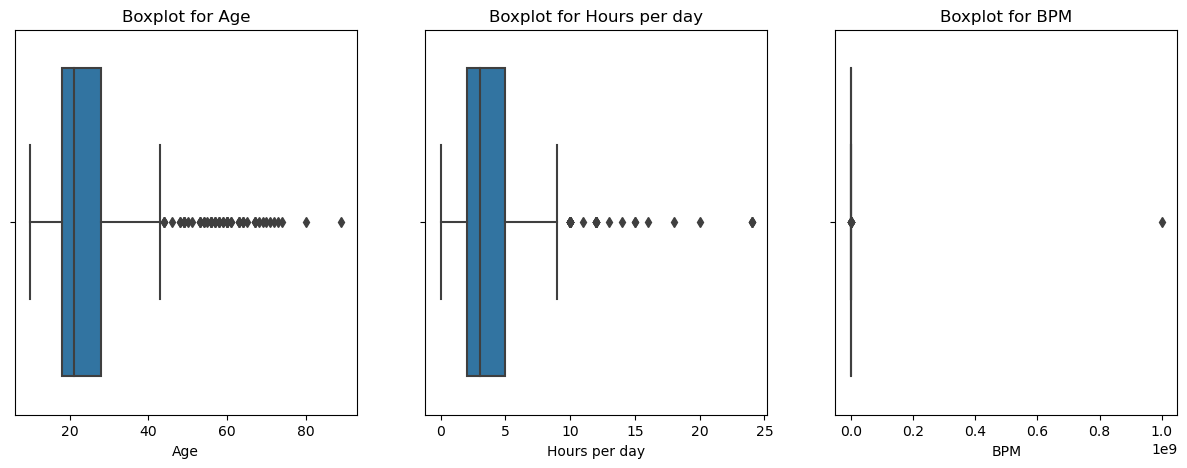

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Boxplot for Age')

sns.boxplot(x=df['Hours per day'], ax=axes[1])
axes[1].set_title('Boxplot for Hours per day')

sns.boxplot(x=df['BPM'], ax=axes[2])
axes[2].set_title('Boxplot for BPM')

plt.show()

# Handling Outliers

In [6]:
# The boxplot shows that only a few data points exist for individuals aged 70 and above. Let's remove these for a more focused analysis.
age = df[(df['Age'] > 70)].index
df = df.drop(age, axis=0)

We'll apply the same methods for the remaining columns

In [7]:
hrs = df[(df['Hours per day'] >= 16)].index
df = df.drop(hrs, axis=0)

In [8]:
bpm = df[(df['BPM'] > 200)].index
df = df.drop(bpm, axis=0)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,715.0,24.843357,11.154407,10.0,18.0,21.0,27.000,70.0
Hours per day,716.0,3.437570,2.588229,0.0,2.0,3.0,4.625,15.0
BPM,611.0,121.967267,32.462976,0.0,100.0,120.0,141.500,200.0
Anxiety,716.0,5.869413,2.784332,0.0,4.0,6.0,8.000,10.0
Depression,716.0,4.818436,3.022502,0.0,2.0,5.0,7.000,10.0
Insomnia,716.0,3.739525,3.069286,0.0,1.0,3.0,6.000,10.0
OCD,716.0,2.634078,2.836483,0.0,0.0,2.0,5.000,10.0


# Handling Missing Values

In [10]:
# Identify columns with missing data
df.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [11]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean(), 0))
df['Primary streaming service'] = df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0])
df['While working'] = df['While working'].fillna(df['While working'].mode()[0])
df['Instrumentalist'] = df['Instrumentalist'].fillna(df['Instrumentalist'].mode()[0])
df['Composer'] = df['Composer'].fillna(df['Composer'].mode()[0])
df['Foreign languages'] = df['Foreign languages'].fillna(df['Foreign languages'].mode()[0])
df['Music effects'] = df['Music effects'].fillna(df['Music effects'].mode()[0])

In [12]:
missing_bpm = df[df['BPM'].isnull() == True]
missing_bpm

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
10,8/27/2022 22:51:15,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,...,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,I understand.
12,8/27/2022 23:04:00,25.0,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.
15,8/27/2022 23:19:52,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,...,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen,I understand.
30,8/28/2022 10:30:22,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve,I understand.
32,8/28/2022 10:54:30,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,...,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,9/24/2022 0:42:39,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,...,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect,I understand.
700,10/3/2022 10:00:01,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,...,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen,I understand.
706,10/3/2022 15:38:19,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve,I understand.
712,10/4/2022 8:53:39,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,...,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve,I understand.


In [13]:
missing_bpm['Fav genre'].unique()

array(['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap'], dtype=object)

In [14]:
# List of genres for which we will impute missing BPM values
miss_bpm_genre = ['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap']

# Loop through each genre in the list
for i in miss_bpm_genre:
    # Calculate the mean BPM for each genre
    # Round the mean to the nearest integer
    # Fill missing BPM values with this rounded mean for rows where the favorite genre matches the current genre in the loop
    df['BPM'] = df['BPM'].fillna(round(df[df['Fav genre']== i ]['BPM'].mean(), 0))

In [15]:
df.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [16]:
# Removing columns that are not relevant to the analysis

df.drop(columns=['Timestamp','Permissions'], inplace=True)


In [17]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [18]:
# Renaming a few columns for more clarity 

def rename_columns(df):
    new_columns = {}
    for col in df.columns:
        # Using regular expressions to find text within brackets
        match = re.search(r'\[(.*?)\]', col)
        if match:
            new_name = match.group(1)
            new_columns[col] = new_name
        else:
            new_columns[col] = col
    df.rename(columns=new_columns, inplace=True)
    
#Rename Columns     
rename_columns(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        716 non-null    float64
 1   Primary streaming service  716 non-null    object 
 2   Hours per day              716 non-null    float64
 3   While working              716 non-null    object 
 4   Instrumentalist            716 non-null    object 
 5   Composer                   716 non-null    object 
 6   Fav genre                  716 non-null    object 
 7   Exploratory                716 non-null    object 
 8   Foreign languages          716 non-null    object 
 9   BPM                        716 non-null    float64
 10  Classical                  716 non-null    object 
 11  Country                    716 non-null    object 
 12  EDM                        716 non-null    object 
 13  Folk                       716 non-null    object 

In [19]:
# Export cleaned dataframe to csv file

df.to_csv('cleaned_data.csv', index=False)